## **Explorating the Tree of Life**

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

Created by Huu Hung Nguyen (ID: 017051866)

Last updated: Sep 15, 2024

Learning outcomes:
In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


In [93]:
euk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [94]:
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors='coerce')

mammals_20000_genes = euk[(euk["Class"] == "Mammals") & (euk["Number of genes"] >= 20000)]

In [95]:
print(f"Number of Mammals with at least 20,000 genes: {len(mammals_20000_genes)}")

Number of Mammals with at least 20,000 genes: 134


In [96]:
print("Scientific names of Mammals with at least 20,000 genes:")
mammals_20000_genes["Species"].to_list()

Scientific names of Mammals with at least 20,000 genes:


['Homo sapiens',
 'Mus musculus',
 'Rattus norvegicus',
 'Felis catus',
 'Bos taurus',
 'Ovis aries',
 'Canis lupus familiaris',
 'Sus scrofa',
 'Ornithorhynchus anatinus',
 'Equus caballus',
 'Pan troglodytes',
 'Macaca mulatta',
 'Monodelphis domestica',
 'Loxodonta africana',
 'Sorex araneus',
 'Erinaceus europaeus',
 'Cavia porcellus',
 'Echinops telfairi',
 'Dasypus novemcinctus',
 'Oryctolagus cuniculus',
 'Pongo abelii',
 'Canis lupus dingo',
 'Papio anubis',
 'Callithrix jacchus',
 'Otolemur garnettii',
 'Ictidomys tridecemlineatus',
 'Nomascus leucogenys',
 'Myotis lucifugus',
 'Pteropus vampyrus',
 'Tursiops truncatus',
 'Microcebus murinus',
 'Dipodomys ordii',
 'Macaca fascicularis',
 'Ochotona princeps',
 'Bubalus bubalis',
 'Galeopterus variegatus',
 'Vicugna pacos',
 'Gorilla gorilla gorilla',
 'Ailuropoda melanoleuca',
 'Cricetulus griseus',
 'Sarcophilus harrisii',
 'Mustela putorius furo',
 'Bos indicus',
 'Odocoileus virginianus texanus',
 'Saimiri boliviensis bolivi

### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [97]:
animals = euk[(euk['Kingdom'] == 'Animals')]
animals

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
34,Caenorhabditis briggsae,Animals,Roundworms,108.38400,37.6966,22736.0,21959,2002,Chromosome
35,Caenorhabditis elegans,Animals,Roundworms,100.28600,35.4317,46857.0,28420,2001,Complete Genome
36,Brugia malayi,Animals,Roundworms,93.65910,31.499,11441.0,11472,2002,Scaffold
37,Aedes aegypti,Animals,Insects,1278.73000,38.1667,19339.0,28317,2017,Chromosome
38,Aedes albopictus,Animals,Insects,2247.31000,40.3999,38274.0,42912,2016,Contig
...,...,...,...,...,...,...,...,...,...
7783,Homo sapiens,Animals,Mammals,4.89807,44.6,NaN,-,2017,Scaffold
7784,Homo sapiens,Animals,Mammals,2.09690,45.8,NaN,-,2017,Scaffold
7789,Homo sapiens,Animals,Mammals,4.78084,44.6,NaN,-,2017,Scaffold
7790,Homo sapiens,Animals,Mammals,4.79943,44.6,NaN,-,2017,Scaffold


In [98]:
print('Number of records for each Class of Animals:')
animals.groupby('Class').size()

Number of records for each Class of Animals:


,0
Class,
Amphibians,7
Birds,172
Fishes,282
Flatworms,47
Insects,602
Mammals,658
Other Animals,210
Reptiles,41
Roundworms,162


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [99]:
print('Number of unique Species for each Class of Animals:')
animals.groupby('Class')['Species'].nunique()

Number of unique Species for each Class of Animals:


,Species
Class,
Amphibians,6
Birds,144
Fishes,218
Flatworms,34
Insects,402
Mammals,313
Other Animals,171
Reptiles,38
Roundworms,116


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [100]:
macana_mammals = euk[(euk['Class'] == 'Mammals') & (euk['Species'].str.split(' ').str[0] == 'Macaca')]

In [101]:
print('The unique scientific names of Mammals with the genus name Macaca:')
list(macana_mammals['Species'].unique())

The unique scientific names of Mammals with the genus name Macaca:


['Macaca mulatta',
 'Macaca fascicularis',
 'Macaca nemestrina',
 'Macaca fuscata fuscata']

### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [102]:
df_species = euk.copy()
df_species['Species'] = df_species['Species'].str.split(' ').str[0:2].str.join(" ")
df_species.drop(columns=['GC%', 'Publication year', 'Assembly status'], inplace=True)
df_species

,Species,Kingdom,Class,Size (Mb),Number of genes,Number of proteins
0,Emiliania huxleyi,Protists,Other Protists,167.676000,38549.0,38554
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,38311.0,48265
2,Glycine max,Plants,Land Plants,979.046000,59847.0,71219
3,Medicago truncatula,Plants,Land Plants,412.924000,37603.0,41939
4,Solanum lycopersicum,Plants,Land Plants,828.349000,31200.0,37660
...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,NaN,-
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,155.0,298
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,NaN,-
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,NaN,-


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [103]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

unique_species_counts = df_species[(df_species['Kingdom'] == 'Animals')].groupby('Class')['Species'].nunique()
unique_species_counts = unique_species_counts.reset_index(name = 'Number of Unique Species')
unique_species_counts = unique_species_counts.set_index('Class')

unique_species_counts

,Number of Unique Species
Class,
Amphibians,6
Birds,140
Fishes,217
Flatworms,34
Insects,360
Mammals,296
Other Animals,169
Reptiles,38
Roundworms,111


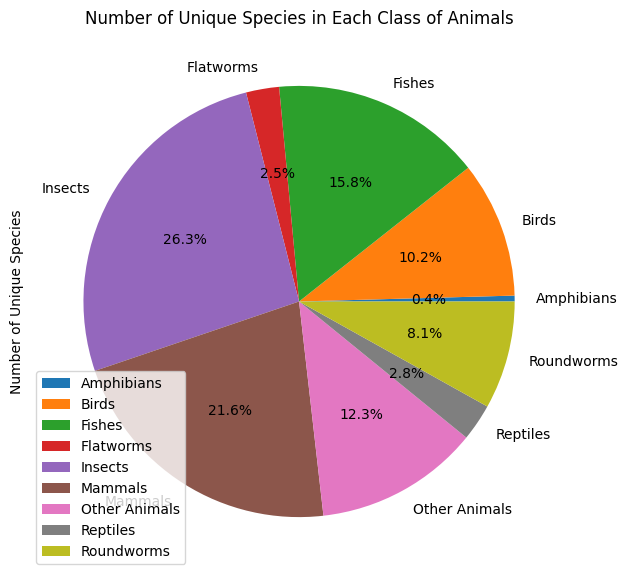

In [104]:
# Create a panda pie plot using the dataframe above

plot = unique_species_counts.plot.pie(
    y='Number of Unique Species',
    figsize=(7, 7),
    autopct='%1.1f%%',
    title='Number of Unique Species in Each Class of Animals')